In [2]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

### View Images from dataset randomly

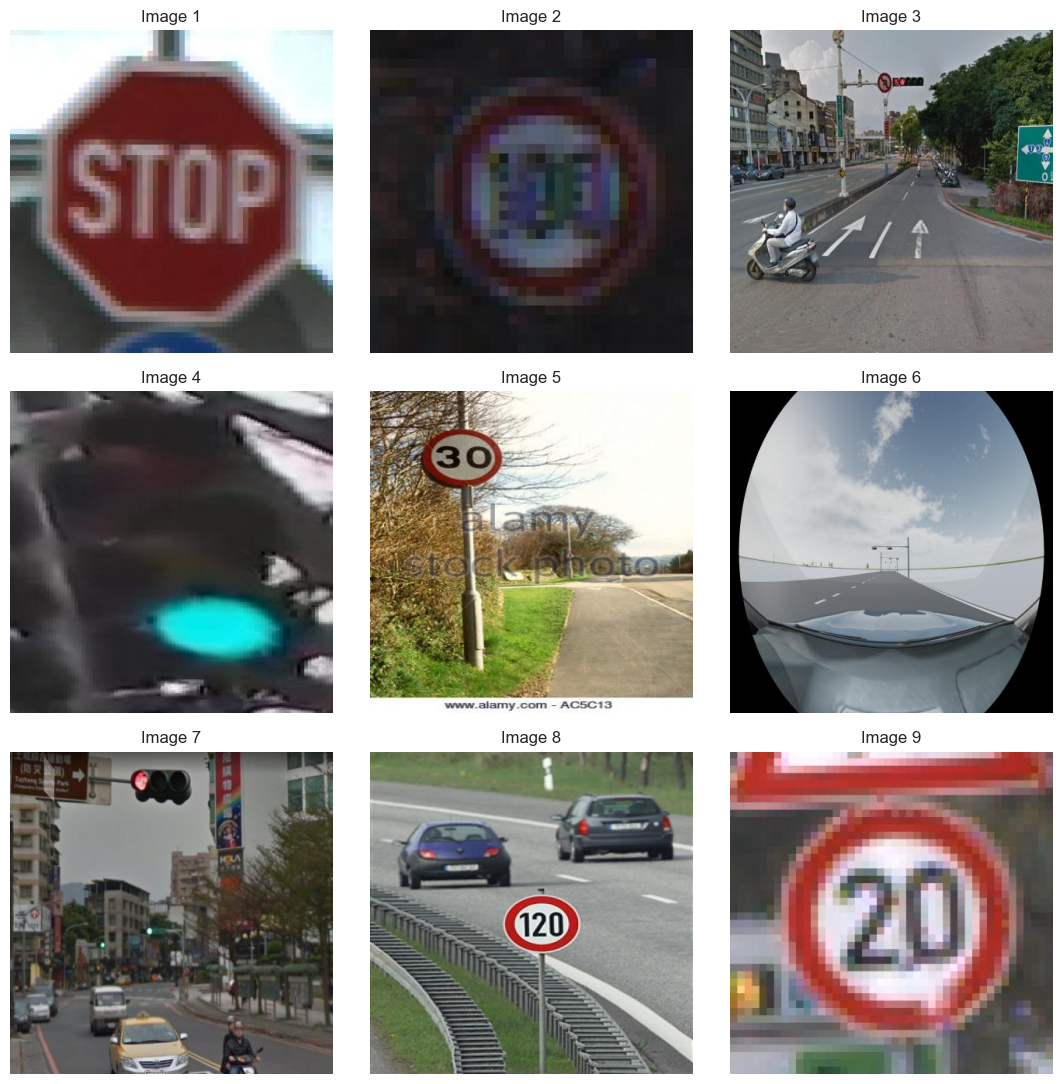

In [5]:
Image_dir = "datasets/traffic-signs-annotated/train/images"
num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Dimensions of the Images

In [ ]:
image = cv2.imread("datasets/traffic-signs-annotated/train/images/00000_00000_00001_png.rf.56c1f101f790944f14f215c7cad2a2b8.jpg")

h, w, c = image.shape
print(f" The Image has dimensions {w}x{h} and {c} channels")

### Predict one Image with Yolov8 Nano

In [ ]:
model = YOLO("yolov8n.pt") 


image = "datasets/traffic-signs-annotated/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(416))


plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
model = YOLO('yolov8n.pt')

new_model = model.train(data="data.yaml",epochs = 20, batch = 16, lr0=0.0001, dropout= 0.15,device = 0)

### Test Model on Unseen Video


In [ ]:
import cv2

VIDEOS_DIR = "datasets/videos/"
video_name = 'video.mp4'
video_path = os.path.join(VIDEOS_DIR, video_name)

VIDEOS_OUT_DIR = "videos_out"
video_path_out = os.path.join(VIDEOS_OUT_DIR,'{}_1out.mp4'.format(video_name[:-4]))

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))


# Load a model
model = YOLO("")  

threshold = 0.1

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()